# < 단어 빈도 워드클라우드 >

In [ ]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터 로드

In [ ]:
# 분리 구분 기호로 데이터 분리
def read_txt(filename, sep=''):
    str = ''
    file = open(filename, 'r')
    str = file.readlines()
    for i in range(0,len(str)):
        str[i] = str[i].strip().split(sep)
    return(str)
    file.close()
    
corpus = read_txt('outputs/corpus.txt',',')
corpus[:3]

[['고급', '장난감', '텐트', '반지하', '가구'],
 ['최근', '영화', '충격'],
 ['지하철', '단어', '언급', '순간', '대다수', '관객', '자신', '어디', '이입']]

## 2. 단어 정제

In [ ]:
import re

# 바꾸기
clean_corpus = [[re.sub('^봉$','봉준호',noun_) for noun_ in nouns] for nouns in corpus]

# 제거
clean_corpus = [[noun_ for noun_ in nouns if noun_ != "영화"] for nouns in clean_corpus]
clean_corpus = [[noun_ for noun_ in nouns if noun_ != "관람객"] for nouns in clean_corpus]

# 불용어 삭제
f = open("data/stopwords_list.txt", 'r', encoding='CP949')
line = [line.rstrip() for line in f.readlines()]

for i in range(len(line)):
    clean_corpus = [[noun_ for noun_ in nouns if noun_ != line[i]] for nouns in clean_corpus]

In [ ]:
clean_corpus[:3]

[['고급', '장난감', '텐트', '반지하', '가구'],
 ['최근', '충격'],
 ['지하철', '단어', '언급', '순간', '대다수', '관객', '이입']]

## 3. 단어 빈도 수

In [ ]:
import pandas as pd

# 단어 카운트 함수
def count_noun(data):
    t_noun = list()
    
    for _ in data:
        t_noun.extend(_)
    
    t_noun_s = pd.DataFrame(t_noun, columns=['word'])
    t_noun_f = t_noun_s.groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
    
    return t_noun_f

# 단어 카운트
frq_corpus = count_noun(clean_corpus)
frq_corpus[:10]

,word,count
0,생각,2981
1,봉준호,2410
2,감독,2145
3,기생충,1782
4,사람,1761
5,최고,1685
6,현실,1376
7,연기,1230
8,기분,1116
9,장면,1065


## 4. TF-IDF

In [ ]:
# 텍스트 정제 함수
def preprocessing_text(data):
    url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
    email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"
    
    for i in range(len(data)):
        data[i] = re.sub(url,"", data[i])
        data[i] = re.sub(email,"", data[i])
        data[i] = re.sub("[^가-힣a-zA-Z ]","", data[i])
        data[i] = data[i].lower()
    return data

In [ ]:
# 자료 형태 변환하기
clean_corpus_unlist = [[" ".join(nouns)] for nouns in clean_corpus]
clean_corpus_str = preprocessing_text(pd.Series(clean_corpus_unlist).astype('str'))
clean_corpus_str

0                                        고급 장난감 텐트 반지하 가구
1                                                   최근 충격
2                                  지하철 단어 언급 순간 대다수 관객 이입
3                                               가정부 장르 역대
4                                          황금종려상 수상 자막 자체
                               ...                       
35756                                               이게 재미
35757                                                    
35758                                       스포일러 포함 상평 상평
35759                                       전형 사회주의 선전 선동
35760    네임 장기 상영 희대 거품 평론가 극찬 정상 조여정 졸지 주연 시대 박소담 최우식 몸값
Length: 35761, dtype: object

In [ ]:
import numpy as np

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0).fit(frq_corpus)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(clean_corpus_str)
max_value = A_tfidf_sp.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
tfidf_dict = np.array(tfidf.get_feature_names())

print("가장 낮은 TF-IDF를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[:50]])
print("가장 높은 TF-IDF를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[-50:]])

가장 낮은 TF-IDF를 가진 특성:
 ['격차' '가난' '이해' '이정은' '이유' '이야기' '이선균' '이게' '이건' '의미' '완벽' '오랜만' '예술'
 '영화제' '영화관' '연출' '연기력' '연기' '여운' '스토리' '순간' '수상' '송강호' '인간' '인생' '자체'
 '작품' '해석' '한국' '필요' '표현' '평점' '코미디' '충격' '추천' '최고' '초반' '천재' '처음' '지하'
 '중간' '조여정' '제목' '정도' '전개' '재미' '장면' '장르' '소재' '소름']
가장 높은 TF-IDF를 가진 특성:
 ['세상' '생각' '누군가' '냄새' '내용' '나라' '긴장감' '기생충' '기생' '기분' '기대' '관람' '관객' '공감'
 '계획' '계급' '결말' '개인' '감정' '감독' '가지' '가족' '가슴' '느낌' '현실' '대박' '마음' '상평'
 '상징' '살인' '사회' '사람' '빈부' '블랙' '불편' '부자' '부분' '봉준호' '배우' '반지하' '반전' '박수'
 '뭔가' '몰입' '모습' '명작' '머리' '마지막' '등급' '황금종려상']


### TF-IDF 낮은 단어 제거

In [ ]:
no_low = [[noun_ for noun_ in nouns if noun_ not in list(tfidf_dict[sorted_by_tfidf[:50]])] for nouns in clean_corpus]
frq_noun = count_noun(no_low)
frq_noun[:10]

,word,count
0,생각,2981
1,봉준호,2410
2,감독,2145
3,기생충,1782
4,사람,1761
5,현실,1376
6,기분,1116
7,가족,983
8,냄새,964
9,배우,863


# 5. 워드클라우드

In [ ]:
word_dict = dict()
for i in range(30):
    word_dict[frq_noun['word'][i]] = frq_noun['count'][i]
word_dict

{'생각': 2981,
 '봉준호': 2410,
 '감독': 2145,
 '기생충': 1782,
 '사람': 1761,
 '현실': 1376,
 '기분': 1116,
 '가족': 983,
 '냄새': 964,
 '배우': 863,
 '기대': 851,
 '사회': 816,
 '불편': 802,
 '내용': 755,
 '계획': 685,
 '느낌': 643,
 '부자': 507,
 '몰입': 490,
 '마음': 487,
 '마지막': 472,
 '황금종려상': 459,
 '관람': 436,
 '뭔가': 420,
 '반지하': 417,
 '가슴': 363,
 '빈부': 358,
 '살인': 338,
 '반전': 328,
 '관객': 324,
 '결말': 316}

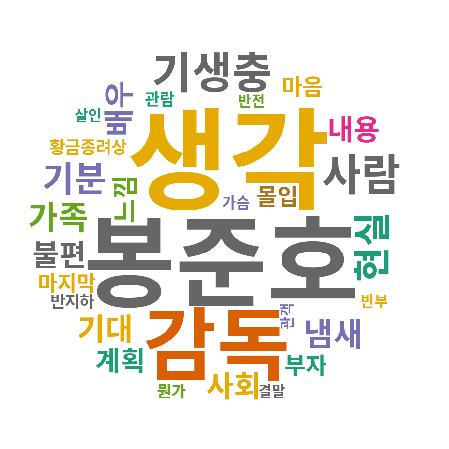

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import requests
import matplotlib.pyplot as plt

font_path = 'data/NotoSansCJKkr-Bold.otf'
url = 'https://banner2.cleanpng.com/20180328/soe/kisspng-circle-blue-shape-ball-clip-art-blue-5abb7206ab0a24.8045066715222338627006.jpg'

mask = np.array(Image.open(requests.get(url, stream=True).raw))

%matplotlib inline
wc = WordCloud(font_path = font_path,
               min_font_size = .5,
               colormap = 'Dark2',
               background_color='white', 
               width=800,
               height=800,
               mask = mask)

cloud = wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)